In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


# **Introdução**

Essa análise busca responder os seguintes questionamentos:

* > O involvimento dos pais tem impacto nas notas dos alunos?
* > Qual a distribuição das horas estudadas pelos alunos? há correlação com o sexo?
* > Alunos de escola particular estudam mais horas durante a semana?

# Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as snr
import matplotlib.pyplot as plt

# Carregando os dados

In [3]:
db  = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
db.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Análise Exploratória de Dados
Nesta seção será realizada a análise da distribuição e do dominío dos dados das seguintes colunas: Parental_Involvement, Exam_Score, Hours_Studied, School_Type e Gender.

# Distribuição das Variáveis Contínuas


In [5]:
db['Hours_Studied'].describe()

count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64

/tmp/ipykernel_17/1710225770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snr.distplot(db["Hours_Studied"]).set_title("Horas Estudadas por Semana")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Horas Estudadas por Semana')

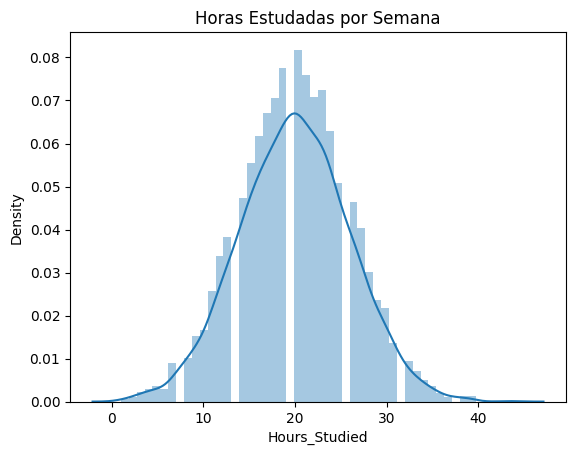

In [6]:
snr.distplot(db["Hours_Studied"]).set_title("Horas Estudadas por Semana")

Percebe-se que há uma concentração de cerca de 20 horas por semana


In [7]:
db['Exam_Score'].describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

/tmp/ipykernel_17/4187128925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snr.distplot(db["Exam_Score"]).set_title("Notas")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Notas')

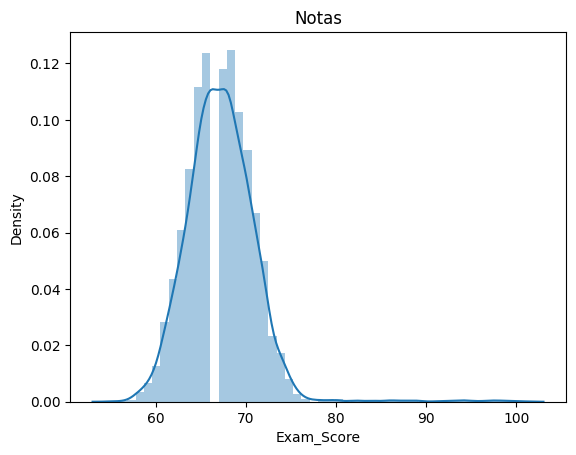

In [8]:
snr.distplot(db["Exam_Score"]).set_title("Notas")

os valores de presença estão entre 60 a 100 com pico em 80

In [9]:
agrupado = db.groupby(["Parental_Involvement"]).size()
agrupado

Parental_Involvement
High      1908
Low       1337
Medium    3362
dtype: int64

# Distribuição das Variáveis Categóricas

Text(0.5, 1.0, 'Envolvimento dos pais')

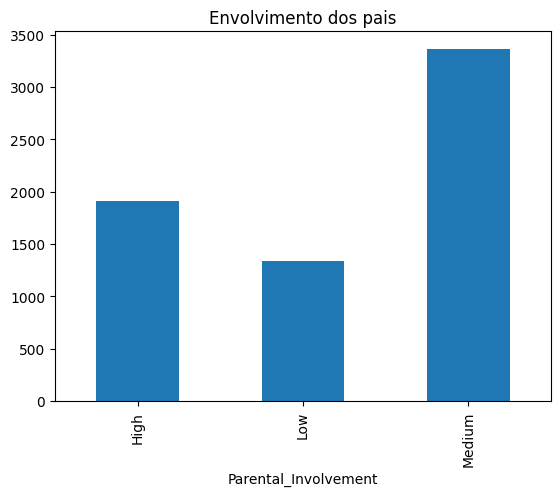

In [10]:
agrupado.plot.bar().set_title("Envolvimento dos pais")

In [11]:
tipo_escola = db.groupby(["School_Type"]).size()
tipo_escola

School_Type
Private    2009
Public     4598
dtype: int64

Text(0.5, 1.0, 'Tipo Escola')

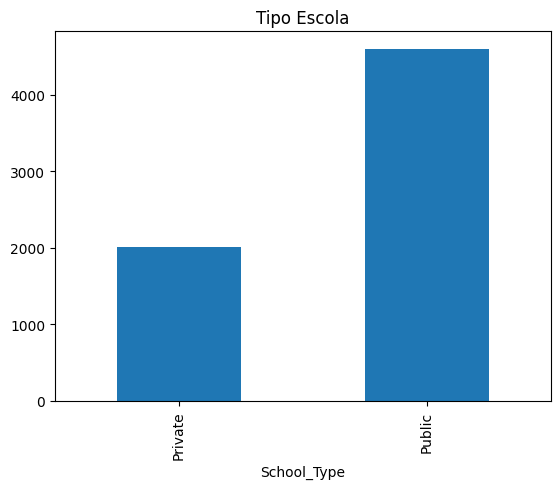

In [12]:
tipo_escola.plot.bar().set_title("Tipo Escola")

In [13]:
genero = db.groupby(["Gender"]).size()
genero

Gender
Female    2793
Male      3814
dtype: int64

Text(0.5, 1.0, 'Gênero')

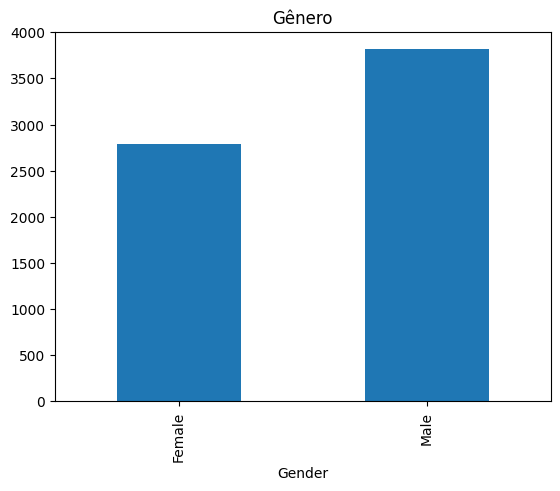

In [14]:
genero.plot.bar().set_title("Gênero")